In [37]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [38]:
img = cv2.imread('dataset/lena.jpg')
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height = grayImage.shape[0]
width = grayImage.shape[1]

In [39]:
def blur(img, kernel_size = 3):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

In [40]:
def add_gaussian_noise(img, sigma):
	gauss = np.random.normal(0, sigma, np.shape(img))
	noisy_img = img + gauss
	noisy_img[noisy_img < 0] = 0
	noisy_img[noisy_img > 255] = 255
	return noisy_img

In [41]:
def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

In [42]:
def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

#### 添加模糊

In [43]:
blurred_img = blur(grayImage, kernel_size = 7)

#### 添加噪声

In [44]:
noisy_img = add_gaussian_noise(blurred_img, sigma = 25)

#### 信噪比未知

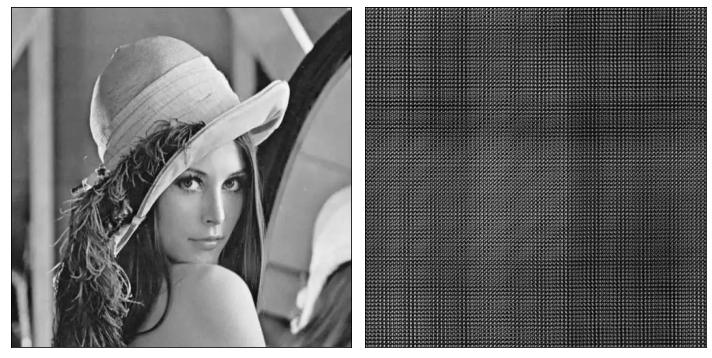

In [45]:
kernel = gaussian_kernel(5)
result = wiener_filter(noisy_img, kernel, K = 0)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


#### 信噪比已知

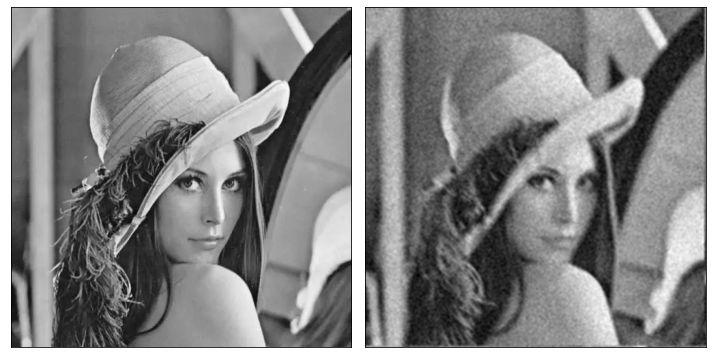

In [46]:
kernel = gaussian_kernel(5)
result = wiener_filter(noisy_img, kernel, K = 5)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#### 信噪比自适应

In [47]:
from scipy.signal import wiener

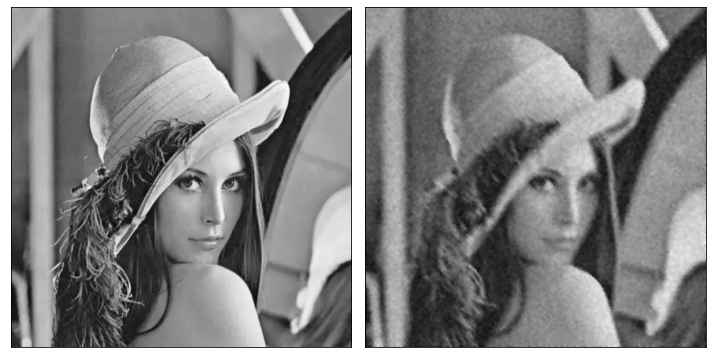

In [48]:
result = wiener(noisy_img, (5, 5))

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()